### 1. Introduction
PCA implementation on MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

### 2. Loading MNIST dataset

In [18]:
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

X = np.array(X)
y = np.array(y)

print("Shape of the dataset:", X.shape)
print("Number of classes:", len(np.unique(y)))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of the dataset: (70000, 784)
Number of classes: 10


### 3. Data preprocessing

In [10]:
from sklearn.impute import SimpleImputer

# Checking for missing values
missing_values = np.isnan(X_scaled)
print("Number of missing values in the dataset:", np.sum(missing_values))

# Replacing missing values with mean of each feature (column-wise imputation)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)


Number of missing values in the dataset: 4550000


### 4. PCA

In [14]:
pca = PCA()
pca.fit(X_imputed)

# Get the number of components required to explain 95% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_imputed)

# Check the number of components needed to explain 95% of the variance
print("Number of components to explain 95% variance:", n_components)

Number of components to explain 95% variance: 332


### 5. Visualization of data in reduced space

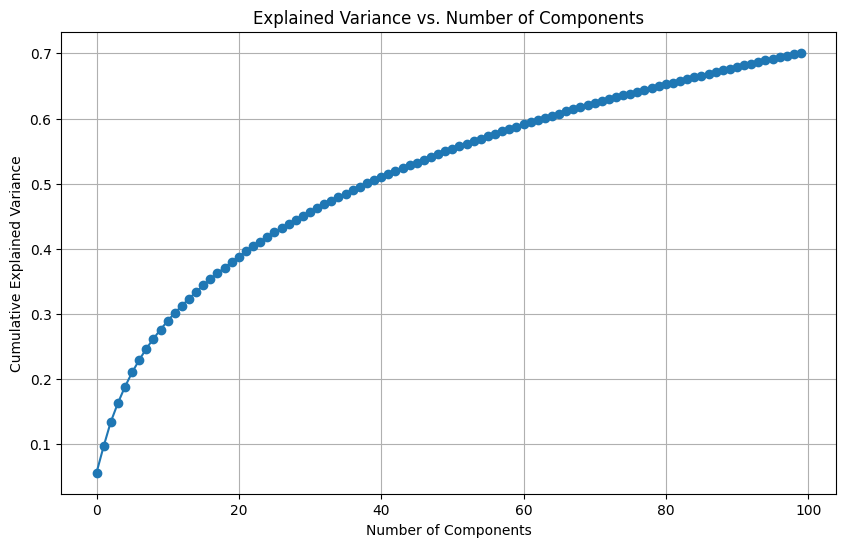

In [15]:
# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

### 6. Classification after PCA

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression classifier on PCA-reduced data:", accuracy)

Accuracy of the Logistic Regression classifier on PCA-reduced data: 0.9221428571428572


### 7. Conclusion
In this notebook, we explored and applied PCA on the MNIST dataset. We visualized the explained variance ratio, reconstructed images, and trained a simple classifier using the PCA-reduced data.

The number of components used here in PCA (n_components = 100) can be adjusted based on the trade-off between dimensionality reduction and preserving information.

### 8. Extra Credits
Find the number of principal components (n_components) for best accuracy